In [1]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import vaex
vaex.multithreading.thread_count_default = 8
import vaex.ml
import pickle

In [2]:
pristine = pd.read_parquet('/arc/projects/k-pop/pristine/Pristine_CFIS.parquet',
                           columns=["CaHK_0","pmra_1","pmdec_1","pmra_error_1","pmdec_error_1","g_chp_psf","r_chp_psf","i_chp_psf","z_chp_psf","y_chp_psf",
                                    "phot_g_mean_mag_1","phot_bp_mean_mag_1","phot_rp_mean_mag_1"])

In [3]:
pristine = pristine.loc[(pristine["g_chp_psf"] < 1e19) & (pristine["r_chp_psf"] < 1e19) & (pristine["i_chp_psf"] < 1e19) & \
                        (pristine["z_chp_psf"] < 1e19) & (pristine["y_chp_psf"] < 1e19) & \
                        (np.isnan(pristine["phot_g_mean_mag_1"]) == False) & (np.isnan(pristine["phot_bp_mean_mag_1"]) == False) & \
                        (np.isnan(pristine["pmra_1"]) == False) & (np.isnan(pristine["pmdec_1"]) == False) & \
                        (np.isnan(pristine["pmra_error_1"]) == False) & (np.isnan(pristine["pmdec_error_1"]) == False) & \
                        (np.isnan(pristine["phot_rp_mean_mag_1"]) == False)]

In [4]:
df = vaex.from_pandas(pd.DataFrame({'PMRA': pristine['pmra_1'],
                   'PMDec': pristine['pmdec_1'],
                   'PMRAerr': pristine['pmra_error_1'],
                   'PMDecerr': pristine['pmdec_error_1'],
                   'G_gaia': pristine['CaHK_0']-pristine['phot_g_mean_mag_1'],
                   'B_gaia': pristine['CaHK_0']-pristine['phot_bp_mean_mag_1'],
                   'R_gaia': pristine['CaHK_0']-pristine['phot_rp_mean_mag_1'],
                   'G_pan': pristine['CaHK_0']-pristine['g_chp_psf'],
                   'R_pan': pristine['CaHK_0']-pristine['r_chp_psf'],
                   'I_pan': pristine['CaHK_0']-pristine['i_chp_psf'],
                   'Z_pan': pristine['CaHK_0']-pristine['z_chp_psf'],
                   'Y_pan': pristine['CaHK_0']-pristine['y_chp_psf']}))

# df2 = vaex.from_pandas(pd.DataFrame({'Fe/H': pristine['FEH_ADOP']}, index = np.arange(0,len(pristine))))

In [5]:
print(df.shape)
data = df.dropna()
print(data.shape)

(3718675, 12)
(3718675, 12)


In [6]:
reducer = umap.UMAP(random_state=42,verbose=True)

In [7]:
scaled_star_data = StandardScaler().fit_transform(data)

In [8]:
reducer.fit(scaled_star_data)

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Wed Feb  2 23:21:05 2022 Finding Nearest Neighbors
Wed Feb  2 23:21:05 2022 Building RP forest with 64 trees
Wed Feb  2 23:22:05 2022 NN descent for 22 iterations
	 1  /  22
	 2  /  22
	Stopping threshold met -- exiting after 2 iterations
Wed Feb  2 23:27:11 2022 Finished Nearest Neighbor Search
Wed Feb  2 23:27:56 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Feb  3 00:42:29 2022 Finished embedding


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)

In [9]:
redu = pickle.dumps(reducer)
filename = 'unsupervised_no_cfis_pickle.obj'

with open(filename,'wb') as file_object:
    file_object.write(redu)

Thu Feb  3 00:54:25 2022 Worst tree score: 0.84041816
Thu Feb  3 00:54:25 2022 Mean tree score: 0.84093700
Thu Feb  3 00:54:25 2022 Best tree score: 0.84164494
Thu Feb  3 00:55:27 2022 Forward diversification reduced edges from 55780125 to 24157300
Thu Feb  3 00:55:39 2022 Reverse diversification reduced edges from 24157300 to 24157300
Thu Feb  3 00:55:44 2022 Degree pruning reduced edges from 24713834 to 24713834
Thu Feb  3 00:55:44 2022 Resorting data and graph based on tree order
Thu Feb  3 00:55:49 2022 Compressing index by removing unneeded attributes
Thu Feb  3 00:55:50 2022 Building and compiling search function


In [10]:
sspp = pd.read_csv('/arc/home/aydanmckay/leftjoinpristinesspp.csv',
                   usecols=["CaHK_0_p","pmra_1_p","pmdec_1_p","g_chp_psf_p","r_chp_psf_p","i_chp_psf_p","z_chp_psf_p","y_chp_psf_p","MAG_AUTO_p",
                            "phot_g_mean_mag_1_p","phot_bp_mean_mag_1_p","phot_rp_mean_mag_1_p","AFE_s","FEH_ADOP_s","TEFF_ADOP_s","LOGG_ADOP_s"])
sspp = sspp.loc[(sspp["g_chp_psf_p"] < 1e19) & (sspp["r_chp_psf_p"] < 1e19) & (sspp["i_chp_psf_p"] < 1e19) & \
                        (sspp["z_chp_psf_p"] < 1e19) & (sspp["y_chp_psf_p"] < 1e19) & (sspp["MAG_AUTO_p"] < 95) & \
                        (np.isnan(sspp["phot_g_mean_mag_1_p"]) == False) & (np.isnan(sspp["phot_bp_mean_mag_1_p"]) == False) & \
                        (np.isnan(sspp["pmra_1_p"]) == False) & (np.isnan(sspp["pmdec_1_p"]) == False) & \
                        (np.isnan(sspp["phot_rp_mean_mag_1_p"]) == False)]
sspp = sspp.replace({'AFE_s': np.nan}, -90)
sspp = sspp.replace({'FEH_ADOP_s': np.nan}, -90)
df_joined_fe = vaex.from_pandas(pd.DataFrame({'PMRA': sspp['pmra_1_p'],
                      'PMDec': sspp['pmdec_1_p'],
                      'G_gaia': sspp["CaHK_0_p"]-sspp['phot_g_mean_mag_1_p'],
                      'B_gaia': sspp["CaHK_0_p"]-sspp['phot_bp_mean_mag_1_p'],
                      'R_gaia': sspp["CaHK_0_p"]-sspp['phot_rp_mean_mag_1_p'],
                      'G_pan': sspp["CaHK_0_p"]-sspp['g_chp_psf_p'],
                      'R_pan': sspp["CaHK_0_p"]-sspp['r_chp_psf_p'],
                      'I_pan': sspp["CaHK_0_p"]-sspp['i_chp_psf_p'],
                      'Z_pan': sspp["CaHK_0_p"]-sspp['z_chp_psf_p'],
                      'Y_pan': sspp["CaHK_0_p"]-sspp['y_chp_psf_p']}))
df2_afe = pd.DataFrame({'a/Fe': sspp['AFE_s']})
df2_feh = pd.DataFrame({'Fe/H': sspp['FEH_ADOP_s']})
df2_logg = pd.DataFrame({'logg': sspp['LOGG_ADOP_s']})
df2_teff = pd.DataFrame({'Teff': sspp['TEFF_ADOP_s']})
print(df_joined_fe.shape)
df_joined_fe = df_joined_fe.dropna()
print(df_joined_fe.shape)
print(df2_afe.shape)
df2_afe = df2_afe.dropna()
print(df2_afe.shape)
print(df2_feh.shape)
df2_feh = df2_feh.dropna()
print(df2_feh.shape)
print(df2_logg.shape)
df2_logg = df2_logg.dropna()
print(df2_logg.shape)
print(df2_teff.shape)
df2_teff = df2_teff.dropna()
print(df2_teff.shape)

(3718245, 10)
(3718245, 10)
(3718245, 1)
(3718245, 1)
(3718245, 1)
(3718245, 1)
(3718245, 1)
(63975, 1)
(3718245, 1)
(63975, 1)


In [11]:
%%time
scaled_star_data_joined_fe = StandardScaler().fit_transform(df_joined_fe)
embedding_joined_fe = reducer.transform(scaled_star_data_joined_fe)

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs
CPU times: user 2h 52min 13s, sys: 5.44 s, total: 2h 52min 19s
Wall time: 3h 2min 28s


In [12]:
embedding = reducer.transform(scaled_star_data)

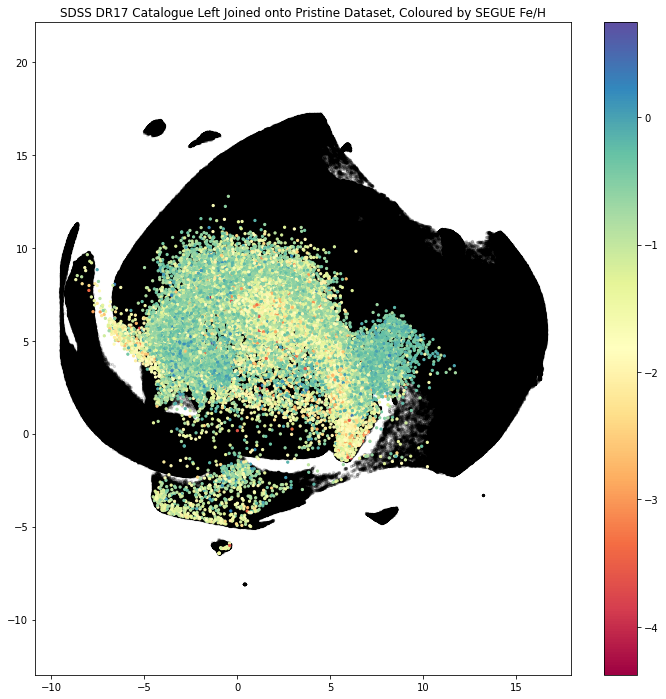

In [13]:
mask_feh = df2_feh['Fe/H'] > -9
plt.figure(figsize=(12,12))
plt.scatter(embedding[:, 0], embedding[:, 1], c='k', alpha=0.1, s=5)
plt.scatter(embedding_joined_fe[:, 0][mask_feh], embedding_joined_fe[:, 1][mask_feh],c=df2_feh['Fe/H'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title("SDSS DR17 Catalogue Left Joined onto Pristine Dataset, Coloured by SEGUE Fe/H")
plt.savefig('/arc/home/aydanmckay/ssppoverplotpristinenocfis.png')

In [15]:
from astropy.io import ascii
from astropy.table import Table
data = Table()
datafeh = Table()
datamask = Table()
data['embedding0'] = embedding[:, 0]
data['embedding1'] = embedding[:, 1]
datafeh['embeddingfeh0'] = embedding_joined_fe[:, 0]
datafeh['embeddingfeh1'] = embedding_joined_fe[:, 1]
datamask['embeddingfeh0mask'] = embedding_joined_fe[:, 0][mask_feh]
datamask['embeddingfeh1mask'] = embedding_joined_fe[:, 1][mask_feh]
datafeh['feh'] = df2_feh['Fe/H']
datamask['fehmask'] = df2_feh['Fe/H'][mask_feh]
ascii.write(data, 'embeddingsnocfis.csv', overwrite=True)  
ascii.write(data, 'embeddingsfehnocfis.csv', overwrite=True)   
ascii.write(data, 'embeddingsmasknocfis.csv', overwrite=True)   